In [97]:
from dotenv import load_dotenv
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

# .env 파일에 있는 값이 시스템 환경 변수의 값보다 항상 우선하도록 설정
# 이것이 다른 값이 나오는 문제를 해결해 줄 것입니다.
load_dotenv() 

# 환경 변수가 로드되었는지 확인
MOVIE_PATH = os.getenv('MOVIE_DATA_PATH')

print("로드된 경로:", MOVIE_PATH)

로드된 경로: G:/내 드라이브/부스트캠프/데이터셋/ml-latest-small/


In [98]:
ratings = pd.read_csv(os.path.join(MOVIE_PATH, "ratings.csv"))
movies = pd.read_csv(os.path.join(MOVIE_PATH, 'movies.csv') )

In [99]:
print("=== [원본] ratings 데이터 (숫자 덩어리) ===")
print(ratings.head())

print("\n=== [원본] movies 데이터 (제목 정보) ===")
print(movies.head())

df = pd.merge(ratings, movies, on='movieId', how='left')



=== [원본] ratings 데이터 (숫자 덩어리) ===
   userId  movieId  rating  timestamp
0       1        1     4.0  964982703
1       1        3     4.0  964981247
2       1        6     4.0  964982224
3       1       47     5.0  964983815
4       1       50     5.0  964982931

=== [원본] movies 데이터 (제목 정보) ===
   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  


In [100]:
print("\n === merged ===")
print(df.head)


 === merged ===
<bound method NDFrame.head of         userId  movieId  rating   timestamp                           title  \
0            1        1     4.0   964982703                Toy Story (1995)   
1            1        3     4.0   964981247         Grumpier Old Men (1995)   
2            1        6     4.0   964982224                     Heat (1995)   
3            1       47     5.0   964983815     Seven (a.k.a. Se7en) (1995)   
4            1       50     5.0   964982931      Usual Suspects, The (1995)   
...        ...      ...     ...         ...                             ...   
100831     610   166534     4.0  1493848402                    Split (2017)   
100832     610   168248     5.0  1493850091   John Wick: Chapter Two (2017)   
100833     610   168250     5.0  1494273047                  Get Out (2017)   
100834     610   168252     5.0  1493846352                    Logan (2017)   
100835     610   170875     3.0  1493846415  The Fate of the Furious (2017)   

    

In [101]:
# Timestamp -> DateTime
# unit s 는 데이터가 초 단위임을 명시한다 
df['date'] =  pd.to_datetime(df['timestamp'], unit='s')
print(df['date'])
df['year'] = df['date'].dt.year
print("="*20)
print(df['year'])
df['month'] = df['date'].dt.month
df['day_of_week'] = df['date'].dt.day_name()

print("=== [결과] 시간을 지배하는 자 ===")
print(df[['timestamp', 'date', 'year', 'month', 'day_of_week']].head())

0        2000-07-30 18:45:03
1        2000-07-30 18:20:47
2        2000-07-30 18:37:04
3        2000-07-30 19:03:35
4        2000-07-30 18:48:51
                 ...        
100831   2017-05-03 21:53:22
100832   2017-05-03 22:21:31
100833   2017-05-08 19:50:47
100834   2017-05-03 21:19:12
100835   2017-05-03 21:20:15
Name: date, Length: 100836, dtype: datetime64[ns]
0         2000
1         2000
2         2000
3         2000
4         2000
          ... 
100831    2017
100832    2017
100833    2017
100834    2017
100835    2017
Name: year, Length: 100836, dtype: int32
=== [결과] 시간을 지배하는 자 ===
   timestamp                date  year  month day_of_week
0  964982703 2000-07-30 18:45:03  2000      7      Sunday
1  964981247 2000-07-30 18:20:47  2000      7      Sunday
2  964982224 2000-07-30 18:37:04  2000      7      Sunday
3  964983815 2000-07-30 19:03:35  2000      7      Sunday
4  964982931 2000-07-30 18:48:51  2000      7      Sunday


가장 많이 본 영화 TOP 5
title
Forrest Gump (1994)                 329
Shawshank Redemption, The (1994)    317
Pulp Fiction (1994)                 307
Silence of the Lambs, The (1991)    279
Matrix, The (1999)                  278
Name: rating, dtype: int64

=== 아무도 안본 영화 TOP 5
title
King Solomon's Mines (1950)                  1
King Solomon's Mines (1937)                  1
King Ralph (1991)                            1
King Kong Lives (1986)                       1
À nous la liberté (Freedom for Us) (1931)    1
Name: rating, dtype: int64


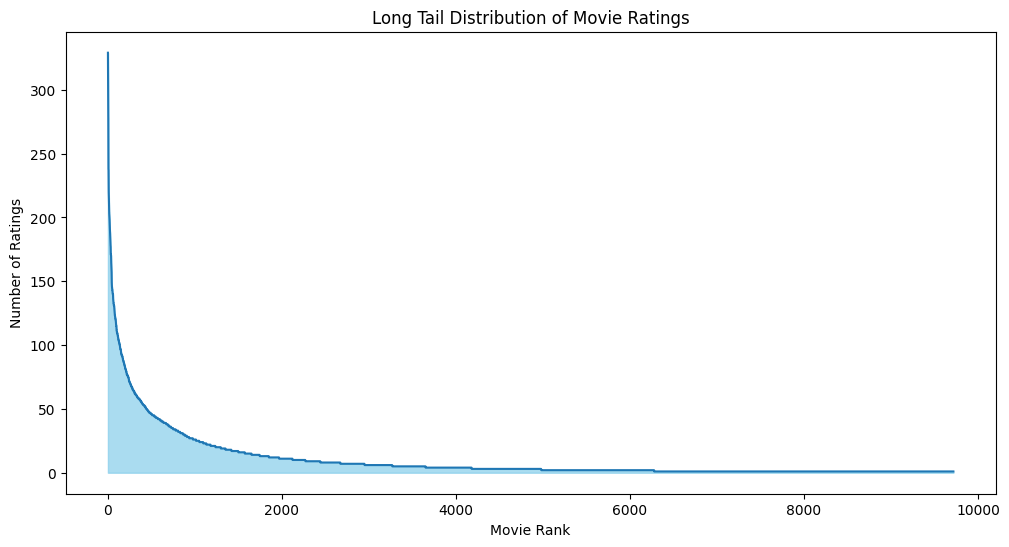

In [102]:


# 영화 제목별로 평점 개수를 세고 내림차순으로 정렬
movie_counts = df.groupby('title')['rating'].count().sort_values(ascending=False)

print("가장 많이 본 영화 TOP 5")
print(movie_counts.head())

print("\n=== 아무도 안본 영화 TOP 5")
print(movie_counts.tail())

# 시각화
plt.figure(figsize=(12,6))

# X 축 등수 Y축 평점 개수

plt.plot(movie_counts.values)

plt.title("Long Tail Distribution of Movie Ratings")
plt.xlabel("Movie Rank")
plt.ylabel("Number of Ratings")
# 그 사이를 채우는 것 
plt.fill_between(range(len(movie_counts)), movie_counts.values, color="skyblue", alpha=0.7)
plt.show()

In [103]:
import pandas as pd

# (이전 단계의 df에서 시작)
# 1. 영화별 통계 계산 (평점 평균, 평점 개수)
movie_stats = df.groupby('title').agg({'rating': ['mean', 'count']})
movie_stats.columns = ['avg_rating', 'vote_count']

# 2. 변수 정의
# C: 전체 영화의 평균 평점 (기준점)
C = movie_stats['avg_rating'].mean()

# m: 최소 투표수 기준 (상위 10% 영화만 랭킹에 올리겠다)
# 이보다 투표수가 적은 영화는 가중치 계산에서 불이익을 받게 됨
m = movie_stats['vote_count'].quantile(0.9)

print(f"=== 기준점 설정 ===")
print(f"전체 평균(C): {C:.2f}")
print(f"최소 투표수(m): {m:.0f} (이거보다 적으면 명함도 못 내밈)")

# 3. IMDB 공식 적용 함수
def weighted_rating(x, m=m, C=C):
    v = x['vote_count']
    R = x['avg_rating']
    # 공식 그대로 구현
    return (v / (v+m) * R) + (m / (v+m) * C)

# 4. 상위 10% 영화만 추출해서 계산 (데이터 효율성)
qualified_movies = movie_stats.loc[movie_stats['vote_count'] >= m].copy()
qualified_movies['score'] = qualified_movies.apply(weighted_rating, axis=1)

# 5. 결과 정렬
qualified_movies = qualified_movies.sort_values('score', ascending=False)

print("\n=== [진정한 명작 TOP 5] (신뢰도 보정 완료) ===")
print(qualified_movies[['avg_rating', 'vote_count', 'score']].head())


=== 기준점 설정 ===
전체 평균(C): 3.26
최소 투표수(m): 27 (이거보다 적으면 명함도 못 내밈)

=== [진정한 명작 TOP 5] (신뢰도 보정 완료) ===
                                           avg_rating  vote_count     score
title                                                                      
Shawshank Redemption, The (1994)             4.429022         317  4.337455
Godfather, The (1972)                        4.289062         192  4.162486
Fight Club (1999)                            4.272936         218  4.161569
Star Wars: Episode IV - A New Hope (1977)    4.231076         251  4.136995
Usual Suspects, The (1995)                   4.237745         204  4.123742


In [104]:
from sklearn.metrics.pairwise import cosine_similarity
user_movie_matrix = df.pivot_table(index='userId', columns='title', values='rating')

user_movie_matrix = user_movie_matrix.fillna(0)

print("=== [변신] 유저-영화 행렬 (Wide Form) ===")
# 영화가 9000개라면 컬럼이 9000개가 된다. 엄청나게 넓은 행렬이다.
print(user_movie_matrix.head())

=== [변신] 유저-영화 행렬 (Wide Form) ===
title   '71 (2014)  'Hellboy': The Seeds of Creation (2004)  \
userId                                                        
1              0.0                                      0.0   
2              0.0                                      0.0   
3              0.0                                      0.0   
4              0.0                                      0.0   
5              0.0                                      0.0   

title   'Round Midnight (1986)  'Salem's Lot (2004)  \
userId                                                
1                          0.0                  0.0   
2                          0.0                  0.0   
3                          0.0                  0.0   
4                          0.0                  0.0   
5                          0.0                  0.0   

title   'Til There Was You (1997)  'Tis the Season for Love (2015)  \
userId                                                              

In [105]:
# 코사인 유사도 계산 
user_similarity = cosine_similarity(user_movie_matrix)
print(user_similarity)
user_sim_df = pd.DataFrame(user_similarity,
                           index=user_movie_matrix.index,
                           columns=user_movie_matrix.index)
print("\n=== [결과] 유저 간 유사도 행렬 (1.0이면 도플갱어) ===")
print(user_sim_df.iloc[:5, :5]) # 5명만 살짝 보자

# [3단계] 나(User 1)와 가장 닮은 사람 찾기
target_user = 1

# 내 행(Row)을 가져와서 내림차순 정렬 (유사도 높은 순)
# 1등은 당연히 나 자신(1.0)이므로 제외하고 2등부터 6등까지 뽑는다.
similar_users = user_sim_df[target_user].sort_values(ascending=False)[1:6]

print(f"\n=== User {target_user}의 영혼의 파트너 TOP 5 ===")
print(similar_users)

[[1.         0.02728287 0.05972026 ... 0.29109737 0.09357193 0.14532081]
 [0.02728287 1.         0.         ... 0.04621095 0.0275654  0.10242675]
 [0.05972026 0.         1.         ... 0.02112846 0.         0.03211875]
 ...
 [0.29109737 0.04621095 0.02112846 ... 1.         0.12199271 0.32205486]
 [0.09357193 0.0275654  0.         ... 0.12199271 1.         0.05322546]
 [0.14532081 0.10242675 0.03211875 ... 0.32205486 0.05322546 1.        ]]

=== [결과] 유저 간 유사도 행렬 (1.0이면 도플갱어) ===
userId         1         2         3         4         5
userId                                                  
1       1.000000  0.027283  0.059720  0.194395  0.129080
2       0.027283  1.000000  0.000000  0.003726  0.016614
3       0.059720  0.000000  1.000000  0.002251  0.005020
4       0.194395  0.003726  0.002251  1.000000  0.128659
5       0.129080  0.016614  0.005020  0.128659  1.000000

=== User 1의 영혼의 파트너 TOP 5 ===
userId
266    0.357408
313    0.351562
368    0.345127
57     0.345034
91     0.334727


In [106]:
item_movie_matrix = user_movie_matrix.T

print("=== [전치] 영화-유저 행렬 ===")
print(item_movie_matrix.head())

item_similarity = cosine_similarity(item_movie_matrix)

item_sim_df = pd.DataFrame(item_similarity,
                           index= item_movie_matrix.index,
                           columns= item_movie_matrix.index)
print("\n=== [결과] 영화 간 상관관계 (이거 보면 저것도 본다) ===")
# 아이언맨(Iron Man)과 가장 비슷한 영화 5개는?
print(item_sim_df['Iron Man (2008)'].sort_values(ascending=False).head())

=== [전치] 영화-유저 행렬 ===
userId                                   1    2    3    4    5    6    7    \
title                                                                        
'71 (2014)                               0.0  0.0  0.0  0.0  0.0  0.0  0.0   
'Hellboy': The Seeds of Creation (2004)  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
'Round Midnight (1986)                   0.0  0.0  0.0  0.0  0.0  0.0  0.0   
'Salem's Lot (2004)                      0.0  0.0  0.0  0.0  0.0  0.0  0.0   
'Til There Was You (1997)                0.0  0.0  0.0  0.0  0.0  0.0  0.0   

userId                                   8    9    10   ...  601  602  603  \
title                                                   ...                  
'71 (2014)                               0.0  0.0  0.0  ...  0.0  0.0  0.0   
'Hellboy': The Seeds of Creation (2004)  0.0  0.0  0.0  ...  0.0  0.0  0.0   
'Round Midnight (1986)                   0.0  0.0  0.0  ...  0.0  0.0  0.0   
'Salem's Lot (2004)                      

In [107]:
import numpy as np
from scipy.sparse.linalg import svds

# SVD 는 데이터의 중심이 0이여야 잘 작동한다?
user_ratings_mean = user_movie_matrix.mean(axis=1)
matrix_norm = user_movie_matrix.sub(user_ratings_mean, axis=0)

# (K=12 잠재 요인을 12개만 쓴다. 액션 로맨스 배우 감독... 등등 숨겨진 차원)

U, sigma, Vt =svds(matrix_norm.to_numpy(), k=12)

sigma = np.diag(sigma)

print(f"=== 분해 완료 ===")
print(f"U (User Latent): {U.shape}") 
print(f"Sigma (Strength): {sigma.shape}")
print(f"Vt (Item Latent): {Vt.shape}")

predicted_matrix = np.dot(np.dot(U, sigma), Vt) + user_ratings_mean.values.reshape(-1, 1)

df_preds = pd.DataFrame(predicted_matrix, 
                        columns=user_movie_matrix.columns, 
                        index=user_movie_matrix.index)

print("\n=== [예측] 모든 빈칸이 채워진 마법의 행렬 ===")
print(df_preds.head())

=== 분해 완료 ===
U (User Latent): (610, 12)
Sigma (Strength): (12, 12)
Vt (Item Latent): (12, 9719)

=== [예측] 모든 빈칸이 채워진 마법의 행렬 ===
title   '71 (2014)  'Hellboy': The Seeds of Creation (2004)  \
userId                                                        
1        -0.069158                                 0.012687   
2        -0.000801                                 0.007793   
3         0.011917                                 0.010399   
4        -0.039344                                -0.007341   
5         0.004148                                -0.003865   

title   'Round Midnight (1986)  'Salem's Lot (2004)  \
userId                                                
1                     0.024235             0.005430   
2                     0.007109             0.001960   
3                     0.011050             0.010187   
4                    -0.000581            -0.003111   
5                    -0.003467            -0.003539   

title   'Til There Was You (1997)  'Tis the

In [108]:
target_user=1
user_predicted_ratings=df_preds.loc[target_user]

# 이미 본 영화 제외
already_seen = user_movie_matrix.loc[target_user] > 0

recommendations = user_predicted_ratings[~already_seen]

top_5_movies = recommendations.sort_values(ascending=False).head(5)

print(f"=== SVD가 예측한 User {target_user}의 취향 저격 영화 TOP 5 ===")
print(top_5_movies)

=== SVD가 예측한 User 1의 취향 저격 영화 TOP 5 ===
title
Terminator 2: Judgment Day (1991)    3.499279
Aliens (1986)                        3.291054
Sixth Sense, The (1999)              3.087899
Die Hard (1988)                      3.052933
Godfather, The (1972)                2.923100
Name: 1, dtype: float64


In [109]:
import numpy as np
from sklearn.metrics import mean_squared_error

# 1. 채점 대상 선정 (실제 평점이 있는 곳만)
# to_numpy()를 써서 판다스 껍데기를 벗기고 계산하는 게 빠르다.
R_actual = user_movie_matrix.to_numpy()
R_predicted = df_preds.to_numpy()

# 0이 아닌 값(실제 평점이 있는 곳)의 좌표만 가져온다.
prediction_indices = R_actual.nonzero()

# 2. 정답지와 답안지 준비
ground_truth = R_actual[prediction_indices]  # 실제 유저가 준 점수
prediction = R_predicted[prediction_indices] # SVD가 예측한 점수

# 3. RMSE 계산
# (실제 - 예측)의 제곱의 평균에 루트를 씌운다.
rmse = np.sqrt(mean_squared_error(ground_truth, prediction))

print(f"=== 최종 성적표 ===")
print(f"RMSE: {rmse:.4f}")

=== 최종 성적표 ===
RMSE: 2.5010
